In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/kaggle/Kesejahteraan-Pekerja-Indonesia'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/kaggle/Kesejahteraan-Pekerja-Indonesia/peng.csv
/content/kaggle/Kesejahteraan-Pekerja-Indonesia/gk.csv
/content/kaggle/Kesejahteraan-Pekerja-Indonesia/upah.df.csv
/content/kaggle/Kesejahteraan-Pekerja-Indonesia/peng.df.csv
/content/kaggle/Kesejahteraan-Pekerja-Indonesia/upah.csv
/content/kaggle/Kesejahteraan-Pekerja-Indonesia/ump.df.csv
/content/kaggle/Kesejahteraan-Pekerja-Indonesia/ump.csv
/content/kaggle/Kesejahteraan-Pekerja-Indonesia/gk.df.csv


# Introduction
Berdasarkan penjelasan oleh Ronaldo Pangarego mengenai dataset dan beberapa pertanyaan pada [link ini]( https://www.kaggle.com/code/ronaldopangarego/analisis-kesejahteraan-pekerja-indonesia/notebook), saya mencoba melakukan analisis mengenai beberapa poin lain, yaitu:
1. Provinsi dengan rata-rata upah bulanan (asumsi jam kerja adalah 176 jam per bulan) lebih rendah dari UMP
2. Korelasi antar atribut dalam data
3. Analisis Upah dan Pengeluaran Bulanan
4. Prediksi Masing-Masing Atribut 5 tahun ke depan dalam Skala Nasional

# Data Import

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

gk = pd.read_csv('/content/kaggle/Kesejahteraan-Pekerja-Indonesia/gk.df.csv')
upah = pd.read_csv('/content/kaggle/Kesejahteraan-Pekerja-Indonesia/upah.df.csv')
pengeluaran = pd.read_csv('/content/kaggle/Kesejahteraan-Pekerja-Indonesia/peng.df.csv')
ump = pd.read_csv('/content/kaggle/Kesejahteraan-Pekerja-Indonesia/ump.df.csv')

In [37]:
gk.describe()
upah.describe()
pengeluaran.describe()
ump.describe()

,tahun,ump
count,735.000000,7.110000e+02
mean,2012.000000,1.402290e+06
std,6.059424,8.762622e+05
min,2002.000000,2.450000e+05
25%,2007.000000,6.639865e+05
50%,2012.000000,1.125207e+06
75%,2017.000000,2.074002e+06
max,2022.000000,4.641854e+06


In [25]:
print(pengeluaran['jenis'].unique())
# print(ump.head())
# print(pengeluaran.head())
# print(upah.head())

['MAKANAN' 'NONMAKANAN' 'TOTAL']


# Data Processing
Karena jangka waktu pada setiap sumber data berbeda, maka saya menggunakan data pada tahun 2015-2022 karena ketersediaan dalam setiap sumber data.

In [38]:
# Menggunakan data dengan jenis "TOTAL" sebagai data gk
gkJenis = gk.query("jenis == 'TOTAL'").groupby(['tahun', 'provinsi'])['gk'].mean().round(0).reset_index()
print(gkJenis)

     tahun           provinsi        gk
0     2013               ACEH  347714.0
1     2013               BALI  274265.0
2     2013             BANTEN  270225.0
3     2013           BENGKULU  320500.0
4     2013      DI YOGYAKARTA  286915.0
..     ...                ...       ...
345   2022  SULAWESI TENGGARA  420774.0
346   2022     SULAWESI UTARA  440359.0
347   2022     SUMATERA BARAT  632289.0
348   2022   SUMATERA SELATAN  503999.0
349   2022     SUMATERA UTARA  574907.0

[350 rows x 3 columns]


In [39]:
# Menggunakan data dengan jenis "TOTAL" sebagai data pengeluaran
pengeluaranJenis = pengeluaran.query("jenis == 'TOTAL'").groupby(['tahun', 'provinsi'])['peng'].mean().round(0).reset_index()
print(pengeluaranJenis)

     tahun           provinsi       peng
0     2007               ACEH   366737.0
1     2007               BALI   426027.0
2     2007             BANTEN   400548.0
3     2007           BENGKULU   339987.0
4     2007      DI YOGYAKARTA   362410.0
..     ...                ...        ...
555   2022  SULAWESI TENGGARA  1153846.0
556   2022     SULAWESI UTARA  1229053.0
557   2022     SUMATERA BARAT  1345257.0
558   2022   SUMATERA SELATAN  1176720.0
559   2022     SUMATERA UTARA  1203490.0

[560 rows x 3 columns]


In [40]:
gkYearly = gkJenis.query("tahun >= 2015").groupby(['tahun', 'provinsi'])['gk'].mean().round(0)
umpYearly = ump.query("tahun >= 2015").groupby(['tahun', 'provinsi'])['ump'].mean().round(0)
pengeluaranYearly = pengeluaranJenis.query("tahun >= 2015").groupby(['tahun', 'provinsi'])['peng'].mean().round(0)
upahYearly = upah.query("tahun >= 2015").groupby(['tahun', 'provinsi'])['upah'].mean().round(0)

# Menggabungkan sumber data menjadi 1 dataframe
resultNotIndexed = pd.concat([gkYearly, umpYearly, pengeluaranYearly, upahYearly], axis=1, join='outer')
result = pd.concat([gkYearly, umpYearly, pengeluaranYearly, upahYearly], axis=1, join='outer').reset_index()

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(result)

# merubah nama kolom
result.rename(columns = {'tahun':'Year', 'provinsi':'Province', 'ump':'Min-Monthly-Salary', 'gk':'Poverty-Line', 'peng':'Monthly-Expense', 'upah':'Avg-Hourly-Salary'}, inplace = True)

print(result)

     tahun           provinsi        gk        ump       peng     upah
0     2015               ACEH  399866.0  1900000.0   801246.0  11226.0
1     2015               BALI  324273.0  1621172.0  1018398.0  11038.0
2     2015             BANTEN  343089.0  1600000.0   966737.0  14228.0
3     2015           BENGKULU  398392.0  1500000.0   843955.0  12491.0
4     2015      DI YOGYAKARTA  337916.0   988500.0   877985.0  10440.0
..     ...                ...       ...        ...        ...      ...
275   2022  SULAWESI TENGGARA  420774.0  2710596.0  1153846.0  17542.0
276   2022     SULAWESI UTARA  440359.0  3310723.0  1229053.0  18335.0
277   2022     SUMATERA BARAT  632289.0  2512539.0  1345257.0  15887.0
278   2022   SUMATERA SELATAN  503999.0  3144446.0  1176720.0  15978.0
279   2022     SUMATERA UTARA  574907.0  2522610.0  1203490.0  15131.0

[280 rows x 6 columns]
     Year           Province  Poverty-Line  Min-Monthly-Salary  Monthly-Expense  Avg-Hourly-Salary
0    2015               A

# Analysis
## Provinsi dengan rata-rata upah bulanan (asumsi jam kerja adalah 173 jam per bulan) lebih rendah dari UMP

In [41]:
# menambahkan kolom monthly-salary dengan perhitungan 173*upah per jam
result['Avg-Monthly-Salary'] = result['Avg-Hourly-Salary']*173

# menambahkan kolom status-salary sebagai indikator apakah salary berada diatas UMP atau tidak
result['Salary-Status'] = np.where(result['Avg-Monthly-Salary'] < result['Min-Monthly-Salary'], 'Below UMP', 'Not Below UMP')

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# resultProvince = result[result['Province'] == 'ACEH']
print(result)

     Year           Province  Poverty-Line  Min-Monthly-Salary  Monthly-Expense  Avg-Hourly-Salary  Avg-Monthly-Salary  Salary-Status
0    2015               ACEH      399866.0           1900000.0         801246.0            11226.0           1942098.0  Not Below UMP
1    2015               BALI      324273.0           1621172.0        1018398.0            11038.0           1909574.0  Not Below UMP
2    2015             BANTEN      343089.0           1600000.0         966737.0            14228.0           2461444.0  Not Below UMP
3    2015           BENGKULU      398392.0           1500000.0         843955.0            12491.0           2160943.0  Not Below UMP
4    2015      DI YOGYAKARTA      337916.0            988500.0         877985.0            10440.0           1806120.0  Not Below UMP
..    ...                ...           ...                 ...              ...                ...                 ...            ...
275  2022  SULAWESI TENGGARA      420774.0           2710596.0

### Jumlah Provinsi dengan Rata-Rata Upah Bulanan dibawah UMP pada 2015-2022
* Tahun 2022 merupakan tahun dengan jumlah provinsi dengan rata-rata upah bulanan dibawah UMP terbanyak dengan 9 provinsi.
* Tahun 2015 tidak terdapat provinsi dengan rata-rata upah bulanan dibawah UMP

### Frekuensi Provinsi memiliki Rata-Rata Upah Bulanan dibawah UMP pada 2015-2022
* Terdapat 9 provinsi yang setidaknya pernah memiliki rata-rata upah bulanan dibawah UMP pada 2015-2022
* Sumatera Selatan merupakan provinsi dengan frekuensi rata-rata upah bulanan dibawah UMP tertinggi dengan 7 kejadian pada 2015-2022

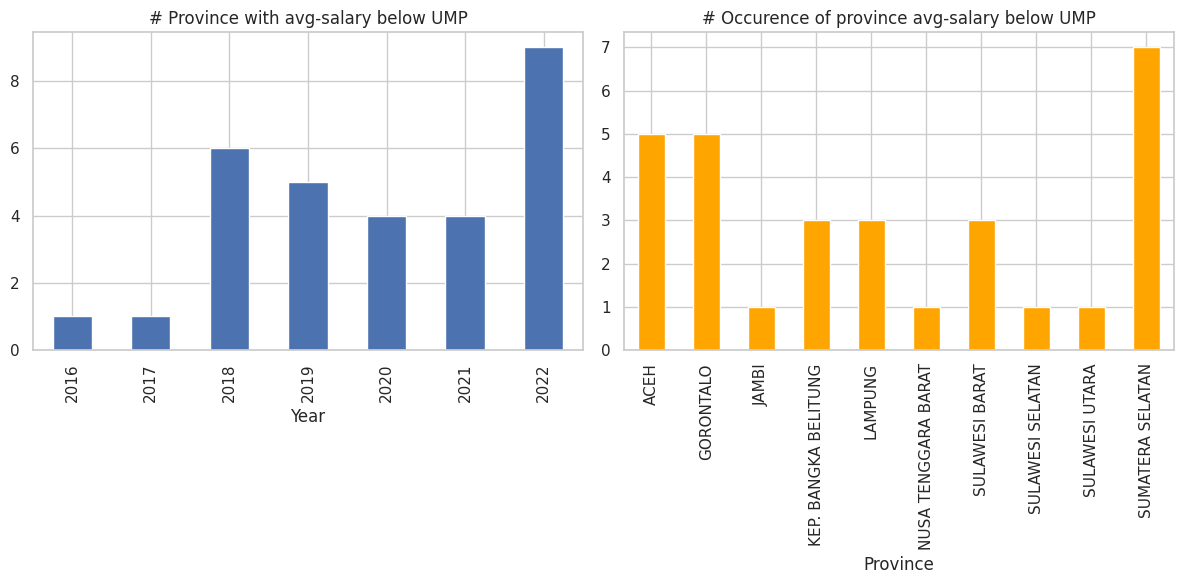

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

countYear = result.query("`Salary-Status` == 'Below UMP'")
countYearGrouped = countYear.groupby(['Year']).size()
# print(countYearGrouped)
countYearGrouped.plot(kind = 'bar', ax = axes[0], subplots=True)

countProvince = result.query("`Salary-Status` == 'Below UMP'")
countProvinceGrouped = countYear.groupby(['Province']).size()
# print(countProvinceGrouped)
countProvinceGrouped.plot(kind = 'bar', ax = axes[1], subplots=True, color='orange')

axes[0].set_title(f"# Province with avg-salary below UMP")
axes[1].set_title(f"# Occurence of province avg-salary below UMP")

plt.tight_layout()
plt.show()

## Korelasi antara garis kemiskinan, upah bulanan, UMP, dan pengeluaran
### Korelasi antar atribut
* Korelasi antar atribut memiliki nilai positif dan cukup tinggi
* Korelasi tertinggi terdapat pada Monthly-Expense dengan Poverty-Line, yang berarti semakin tinggi nilai salah satu atribut tersebut maka semakin tinggi pula nilai atribut lainnya
* Korelasi terendah terdapat pada Min-Monthly-Salary (UMP) dengan Poverty-Line

In [43]:
result.loc[:, ~result.columns.isin(['Province', 'Year', 'Salary-Status'])].corr()

,Poverty-Line,Min-Monthly-Salary,Monthly-Expense,Avg-Hourly-Salary,Avg-Monthly-Salary
Poverty-Line,1.000000,0.632788,0.795783,0.648851,0.648851
Min-Monthly-Salary,0.632788,1.000000,0.689815,0.696643,0.696643
Monthly-Expense,0.795783,0.689815,1.000000,0.765928,0.765928
Avg-Hourly-Salary,0.648851,0.696643,0.765928,1.000000,1.000000
Avg-Monthly-Salary,0.648851,0.696643,0.765928,1.000000,1.000000


### Visualisasi Perubahan Nilai Tiap Atribut
* Seluruh atribut memiliki trend yang sama, yaitu kenaikan nilai

     Year   Province  Poverty-Line  Min-Monthly-Salary  Monthly-Expense  Avg-Hourly-Salary  Avg-Monthly-Salary  Salary-Status
7    2015  INDONESIA      337570.0           1790342.0         867634.0            11434.0           1978082.0  Not Below UMP
42   2016  INDONESIA      357848.0           1997819.0         941885.0            14068.0           2433764.0  Not Below UMP
77   2017  INDONESIA      380110.0           2073332.0        1026872.0            14731.0           2548463.0  Not Below UMP
112  2018  INDONESIA      404889.0           2268874.0        1109115.0            15275.0           2642575.0  Not Below UMP
147  2019  INDONESIA      431524.0           2455662.0        1145426.0            15823.0           2737379.0  Not Below UMP
182  2020  INDONESIA      455347.0           2672371.0        1205005.0            17696.0           3061408.0  Not Below UMP
217  2021  INDONESIA      477655.0           2684743.0        1241120.0            18089.0           3129397.0  Not Be

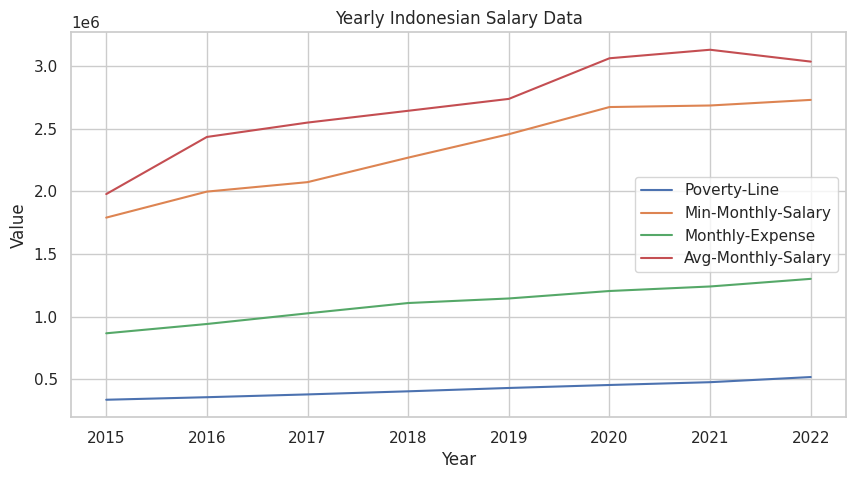

In [44]:
resultNational = result[result['Province'] == 'INDONESIA']
print(resultNational)

import matplotlib.pyplot as plt

resultNational.plot(x='Year', y=['Poverty-Line', 'Min-Monthly-Salary', 'Monthly-Expense', 'Avg-Monthly-Salary'], figsize=(10,5))

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Value')

# Set the title of the plot
plt.title('Yearly Indonesian Salary Data')

# Display the plot
plt.show()



## Analisis Perbandingan Upah dengan Pengeluaran Per Bulan tiap provinsi
* Provinsi Papua memiliki persentase selisih upah dan pengeluaran tertinggi (358,89%) di Indonesia (pemasukan tinggi, pengeluaran rendah), sedangkan Provinsi Bangka Belitung adalah yang terendah (198,16%)
* Hampir seluruh provinsi memiliki pemasukan lebih dari 2 kali lipat pengeluaran (200%), kecuali DI Jogjakarta (199,82%) dan Bangka Belitung (198,16%)

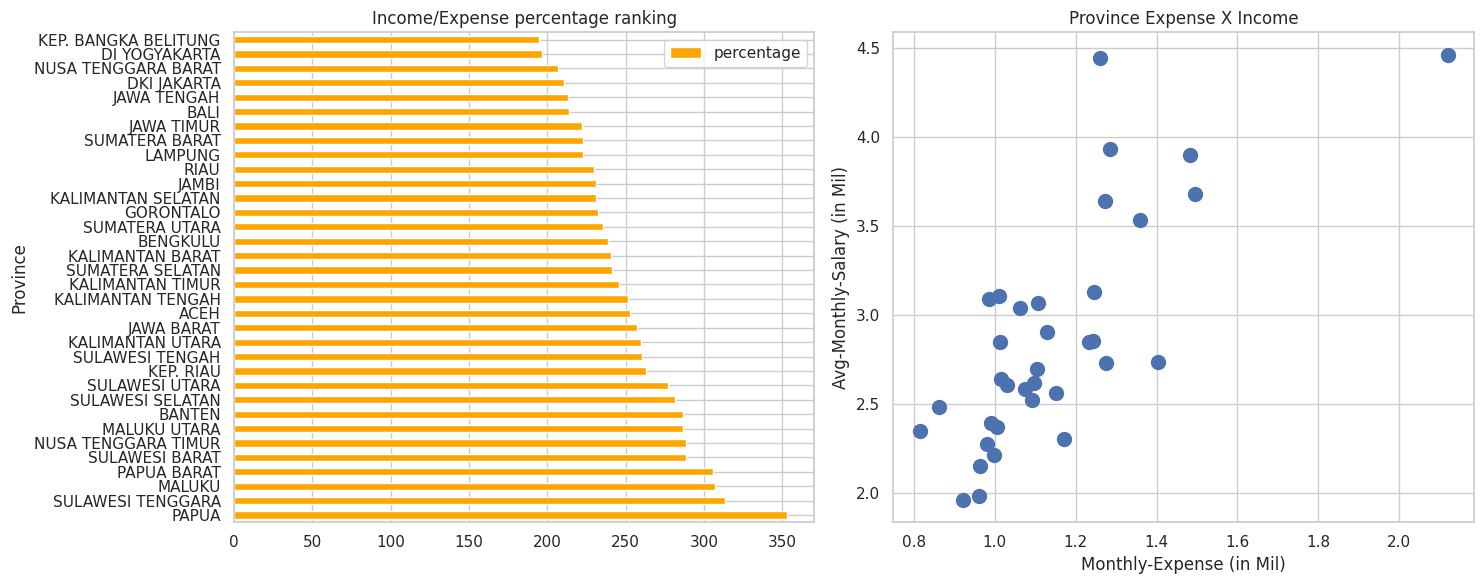

,Province,Avg-Monthly-Salary,Monthly-Expense,Avg-Monthly-Salary (in Mil),Monthly-Expense (in Mil),percentage
24,PAPUA,4443851.0,1259690.0,4.443851,1.259690,352.773381
30,SULAWESI TENGGARA,3087942.0,985877.0,3.087942,0.985877,313.217775
20,MALUKU,3104096.0,1010238.0,3.104096,1.010238,307.263833
25,PAPUA BARAT,3933242.0,1285878.0,3.933242,1.285878,305.879874
27,SULAWESI BARAT,2484583.0,860630.0,2.484583,0.860630,288.693515
...,...,...,...,...,...,...
10,JAWA TENGAH,1961106.0,920213.0,1.961106,0.920213,213.114355
5,DKI JAKARTA,4460372.0,2120320.0,4.460372,2.120320,210.363153
22,NUSA TENGGARA BARAT,1984202.0,960010.0,1.984202,0.960010,206.685555
4,DI YOGYAKARTA,2301008.0,1171306.0,2.301008,1.171306,196.448067


In [45]:
averageProvinceSalary = result.groupby(['Province'])['Avg-Monthly-Salary'].mean().round(0)
averageProvinceExpense = result.groupby(['Province'])['Monthly-Expense'].mean().round(0)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

averageProvince = pd.concat([averageProvinceSalary, averageProvinceExpense], axis=1, join='outer').reset_index()
averageProvince['Avg-Monthly-Salary (in Mil)'] = averageProvince['Avg-Monthly-Salary']/1000000
averageProvince['Monthly-Expense (in Mil)'] = averageProvince['Monthly-Expense']/1000000
# averageProvince
ax = averageProvince.plot(kind='scatter', x = 'Monthly-Expense (in Mil)', y = 'Avg-Monthly-Salary (in Mil)', s = 100, ax = axes[1], subplots=True)



averageProvince['percentage'] = 100*averageProvince['Avg-Monthly-Salary']/averageProvince['Monthly-Expense']
averageProvincePercentage = averageProvince.query("`Province` != 'INDONESIA'")
averageProvincePercentage = averageProvincePercentage.sort_values(by=['percentage'], ascending=False)
# averageProvincePercentage
averageProvincePercentage.plot(kind="barh", color='orange', x='Province', y='percentage', ax = axes[0], subplots=True)


axes[1].set_title(f"Province Expense X Income")
axes[0].set_title(f"Income/Expense percentage ranking")

# plt.xticks(np.arange(0, 5,step=0.5))
# plt.yticks(np.arange(0, 5,step=0.5))
plt.tight_layout()
plt.show()

averageProvincePercentage

## Prediksi Nilai Masing-Masing Atribut dalam Skala Nasional
Metode yang digunakan dalam prediksi adalah Linear Regression pada 5 tahun ke depan (2023-2027)

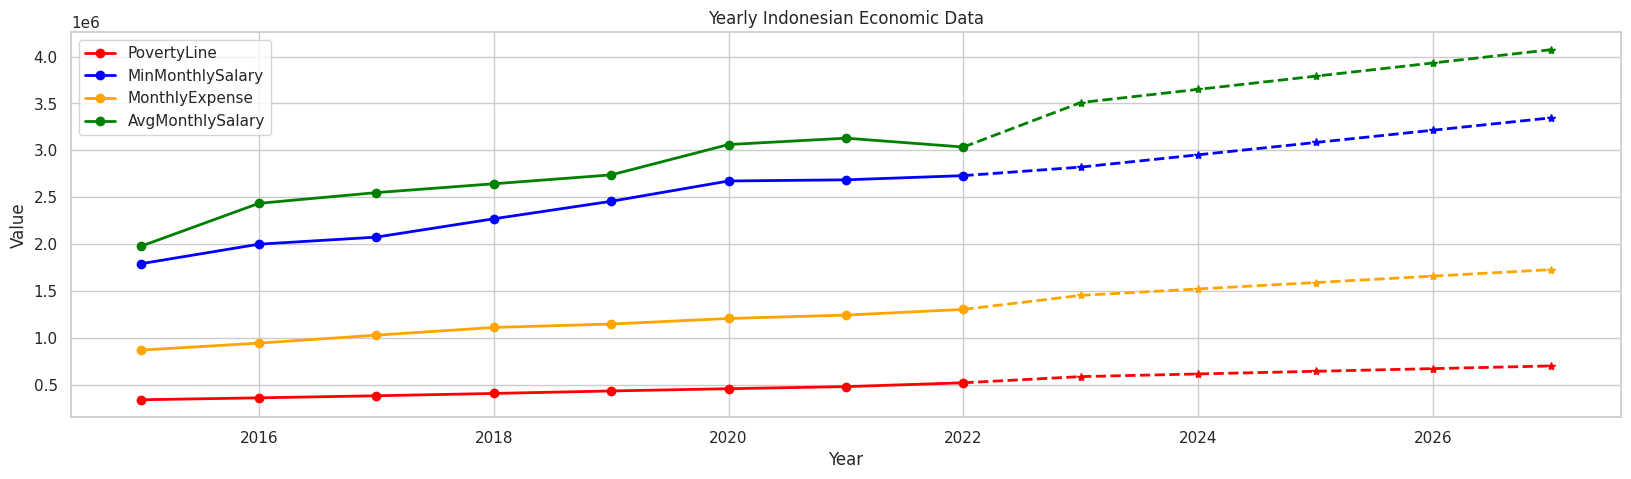

In [46]:
resultNational = result[result['Province'] == 'INDONESIA']
# print(resultNational)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

# merubah nama kolom
resultNational.rename(columns = {'Min-Monthly-Salary':'MinMonthlySalary', 'Poverty-Line':'PovertyLine', 'Monthly-Expense':'MonthlyExpense', 'Avg-Monthly-Salary':'AvgMonthlySalary'}, inplace = True)

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

# Process Data GK
gkClear = gkJenis.groupby(['tahun'])['gk'].mean().round(0).reset_index()
gkClear.rename(columns = {'tahun':'Year', 'gk':'PovertyLine'}, inplace = True)
modelPoverty = model1.fit( gkClear[["Year"]], gkClear["PovertyLine"] )

# Process Data UMP
umpClear = ump.groupby(['tahun'])['ump'].mean().round(0).reset_index()
umpClear.rename(columns = {'tahun':'Year', 'ump':'MinMonthlySalary'}, inplace = True)
modelUmp = model2.fit( umpClear[["Year"]], umpClear["MinMonthlySalary"] )

# Process Data Expense
pengeluaranClear = pengeluaranJenis.groupby(['tahun'])['peng'].mean().round(0).reset_index()
pengeluaranClear.rename(columns = {'tahun':'Year', 'peng':'MonthlyExpense'}, inplace = True)
modelExpense = model3.fit( pengeluaranClear[["Year"]], pengeluaranClear["MonthlyExpense"] )

# Process Data Expense
upahClear = upah.groupby(['tahun'])['upah'].mean().round(0).reset_index()
upahClear.rename(columns = {'tahun':'Year'}, inplace = True)
upahClear['AvgMonthlySalary'] = upahClear['upah']*173
modelSalary = model4.fit( upahClear[["Year"]], upahClear["AvgMonthlySalary"] )


data = []
data.append( {"Year": 2023} )
data.append( {"Year": 2024} )
data.append( {"Year": 2025} )
data.append( {"Year": 2026} )
data.append( {"Year": 2027} )
df2 = pd.DataFrame(data)

# Add a new column to df2 with the predicted prices:
res = pd.DataFrame(data)
res["MinMonthlySalary"] = modelUmp.predict(df2)
res["PovertyLine"] = modelPoverty.predict(df2)
res["MonthlyExpense"] = modelExpense.predict(df2)
res["AvgMonthlySalary"] = modelSalary.predict(df2)
res

resultNational = resultNational.drop(columns=['Province', 'Salary-Status', 'Avg-Hourly-Salary'])
finalResult = pd.concat([resultNational, res], axis=0, join='outer').reset_index()
prediction = finalResult.query("Year >= 2022")
# print(prediction)

# resultNational.plot(x='Year', y=['PovertyLine', 'MinMonthlySalary', 'MonthlyExpense', 'AvgMonthlySalary'], figsize=(15,5))

# Plot Existing Data
plt.plot('Year', 'PovertyLine', data=resultNational, marker='o', color='red', linewidth=2)
plt.plot('Year', 'MinMonthlySalary', data=resultNational, marker='o', color='blue', linewidth=2)
plt.plot('Year','MonthlyExpense',data=resultNational ,marker='o',color='orange', linewidth=2)
plt.plot('Year','AvgMonthlySalary',data=resultNational ,marker='o',color='green', linewidth=2)

# Plot Prediction Data
plt.plot('Year', 'PovertyLine', data=prediction, marker='*', color='red', linewidth=2, linestyle = '--')
plt.plot('Year', 'MinMonthlySalary', data=prediction, marker='*', color='blue', linewidth=2, linestyle = '--')
plt.plot('Year','MonthlyExpense',data=prediction ,marker='*',color='orange', linewidth=2, linestyle = '--')
plt.plot('Year','AvgMonthlySalary',data=prediction ,marker='*',color='green', linewidth=2, linestyle = '--')

# Set the label
plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel('Year')
plt.ylabel('Value')

# Set the title of the plot
plt.title('Yearly Indonesian Economic Data')
plt.legend(['PovertyLine', 'MinMonthlySalary', 'MonthlyExpense', 'AvgMonthlySalary'], loc='best')

# # Display the plot
plt.show()

# Conclusion
## Provinsi dengan rata-rata upah bulanan (asumsi jam kerja adalah 173 jam per bulan) lebih rendah dari UMP
### Jumlah Provinsi dengan Rata-Rata Upah Bulanan dibawah UMP pada 2015-2022
* Tahun 2022 merupakan tahun dengan jumlah provinsi dengan rata-rata upah bulanan dibawah UMP terbanyak dengan 9 provinsi.
* Tahun 2015 tidak terdapat provinsi dengan rata-rata upah bulanan dibawah UMP

### Frekuensi Provinsi memiliki Rata-Rata Upah Bulanan dibawah UMP pada 2015-2022
* Terdapat 9 provinsi yang setidaknya pernah memiliki rata-rata upah bulanan dibawah UMP pada 2015-2022
* Sumatera Selatan merupakan provinsi dengan frekuensi rata-rata upah bulanan dibawah UMP tertinggi dengan 7 kejadian pada 2015-2022

## Korelasi antar atribut dalam data
### Korelasi antar atribut
* Korelasi antar atribut memiliki nilai positif dan cukup tinggi
* Korelasi tertinggi terdapat pada Monthly-Expense dengan Poverty-Line, yang berarti semakin tinggi nilai salah satu atribut tersebut maka semakin tinggi pula nilai atribut lainnya
* Korelasi terendah terdapat pada Min-Monthly-Salary (UMP) dengan Poverty-Line

### Perubahan Nilai Tiap Atribut
* Seluruh atribut memiliki trend yang sama, yaitu kenaikan nilai tiap tahunnya

## Analisis Upah dan Pengeluaran Bulanan
* Provinsi Papua memiliki persentase selisih upah dan pengeluaran tertinggi (358,89%) di Indonesia (pemasukan tinggi, pengeluaran rendah), sedangkan Provinsi Bangka Belitung adalah yang terendah (198,16%)
* Hampir seluruh provinsi memiliki pemasukan lebih dari 2 kali lipat pengeluaran (200%), kecuali DI Jogjakarta (199,82%) dan Bangka Belitung (198,16%)

## Prediksi Masing-Masing Atribut 5 tahun ke depan dalam Skala Nasional
* Tidak ada overlap pada seluruh atribut dengan atribut lainnya
* Rata-rata upah tetap berada di atas rata-rata UMP, begitu pula dengan pengeluaran yang tetap berada di bawah UMP
* Rata-Rata Upah dan UMP akan terus meningkat dengan peningkatan lebih tinggi daripada pengeluaran
* Garis kemiskinan meningkat namun dengan nilai yang tidak signifikan

### AUTHOR:

PRASETYO NUGROHADI

REZKY YAYANG YAKHAMID

SUMBER:

https://www.kaggle.com/datasets/rezkyyayang/pekerja-sejahtera

https://www.kaggle.com/code/prasetyon/indonesia-avgsalary-and-minwage-analysis-15-22/notebook